C:\Users\k_lab_pc\anaconda3\envs\python37\lib\site-packages\dcekit\generative_model\gtm.py:253: RuntimeWarning: divide by zero encountered in log
  np.prod(self.shape_of_map) * rbf_for_responsibility.sum(axis=1))).sum()


1/100 ... likelihood: -inf
2/100 ... likelihood: -71979.4439416697
3/100 ... likelihood: -71086.28940616861
4/100 ... likelihood: -70698.81226844684
5/100 ... likelihood: -70432.05226446234
6/100 ... likelihood: -70223.62985361807
7/100 ... likelihood: -70077.50032733458
8/100 ... likelihood: -69983.06517633947
9/100 ... likelihood: -69925.59384543276
10/100 ... likelihood: -69889.39772446716
11/100 ... likelihood: -69864.81461625488
12/100 ... likelihood: -69846.09982270324
13/100 ... likelihood: -69829.67726317358
14/100 ... likelihood: -69812.69399598363
15/100 ... likelihood: -69792.59389196293
16/100 ... likelihood: -69768.20897531163
17/100 ... likelihood: -69740.19446566839
18/100 ... likelihood: -69708.44616806452
19/100 ... likelihood: -69665.4842542639
20/100 ... likelihood: -69609.25456953555
21/100 ... likelihood: -69550.22350204535
22/100 ... likelihood: -69496.0032923854
23/100 ... likelihood: -69444.61383073468
24/100 ... likelihood: -69394.51860503163
25/100 ... likelih

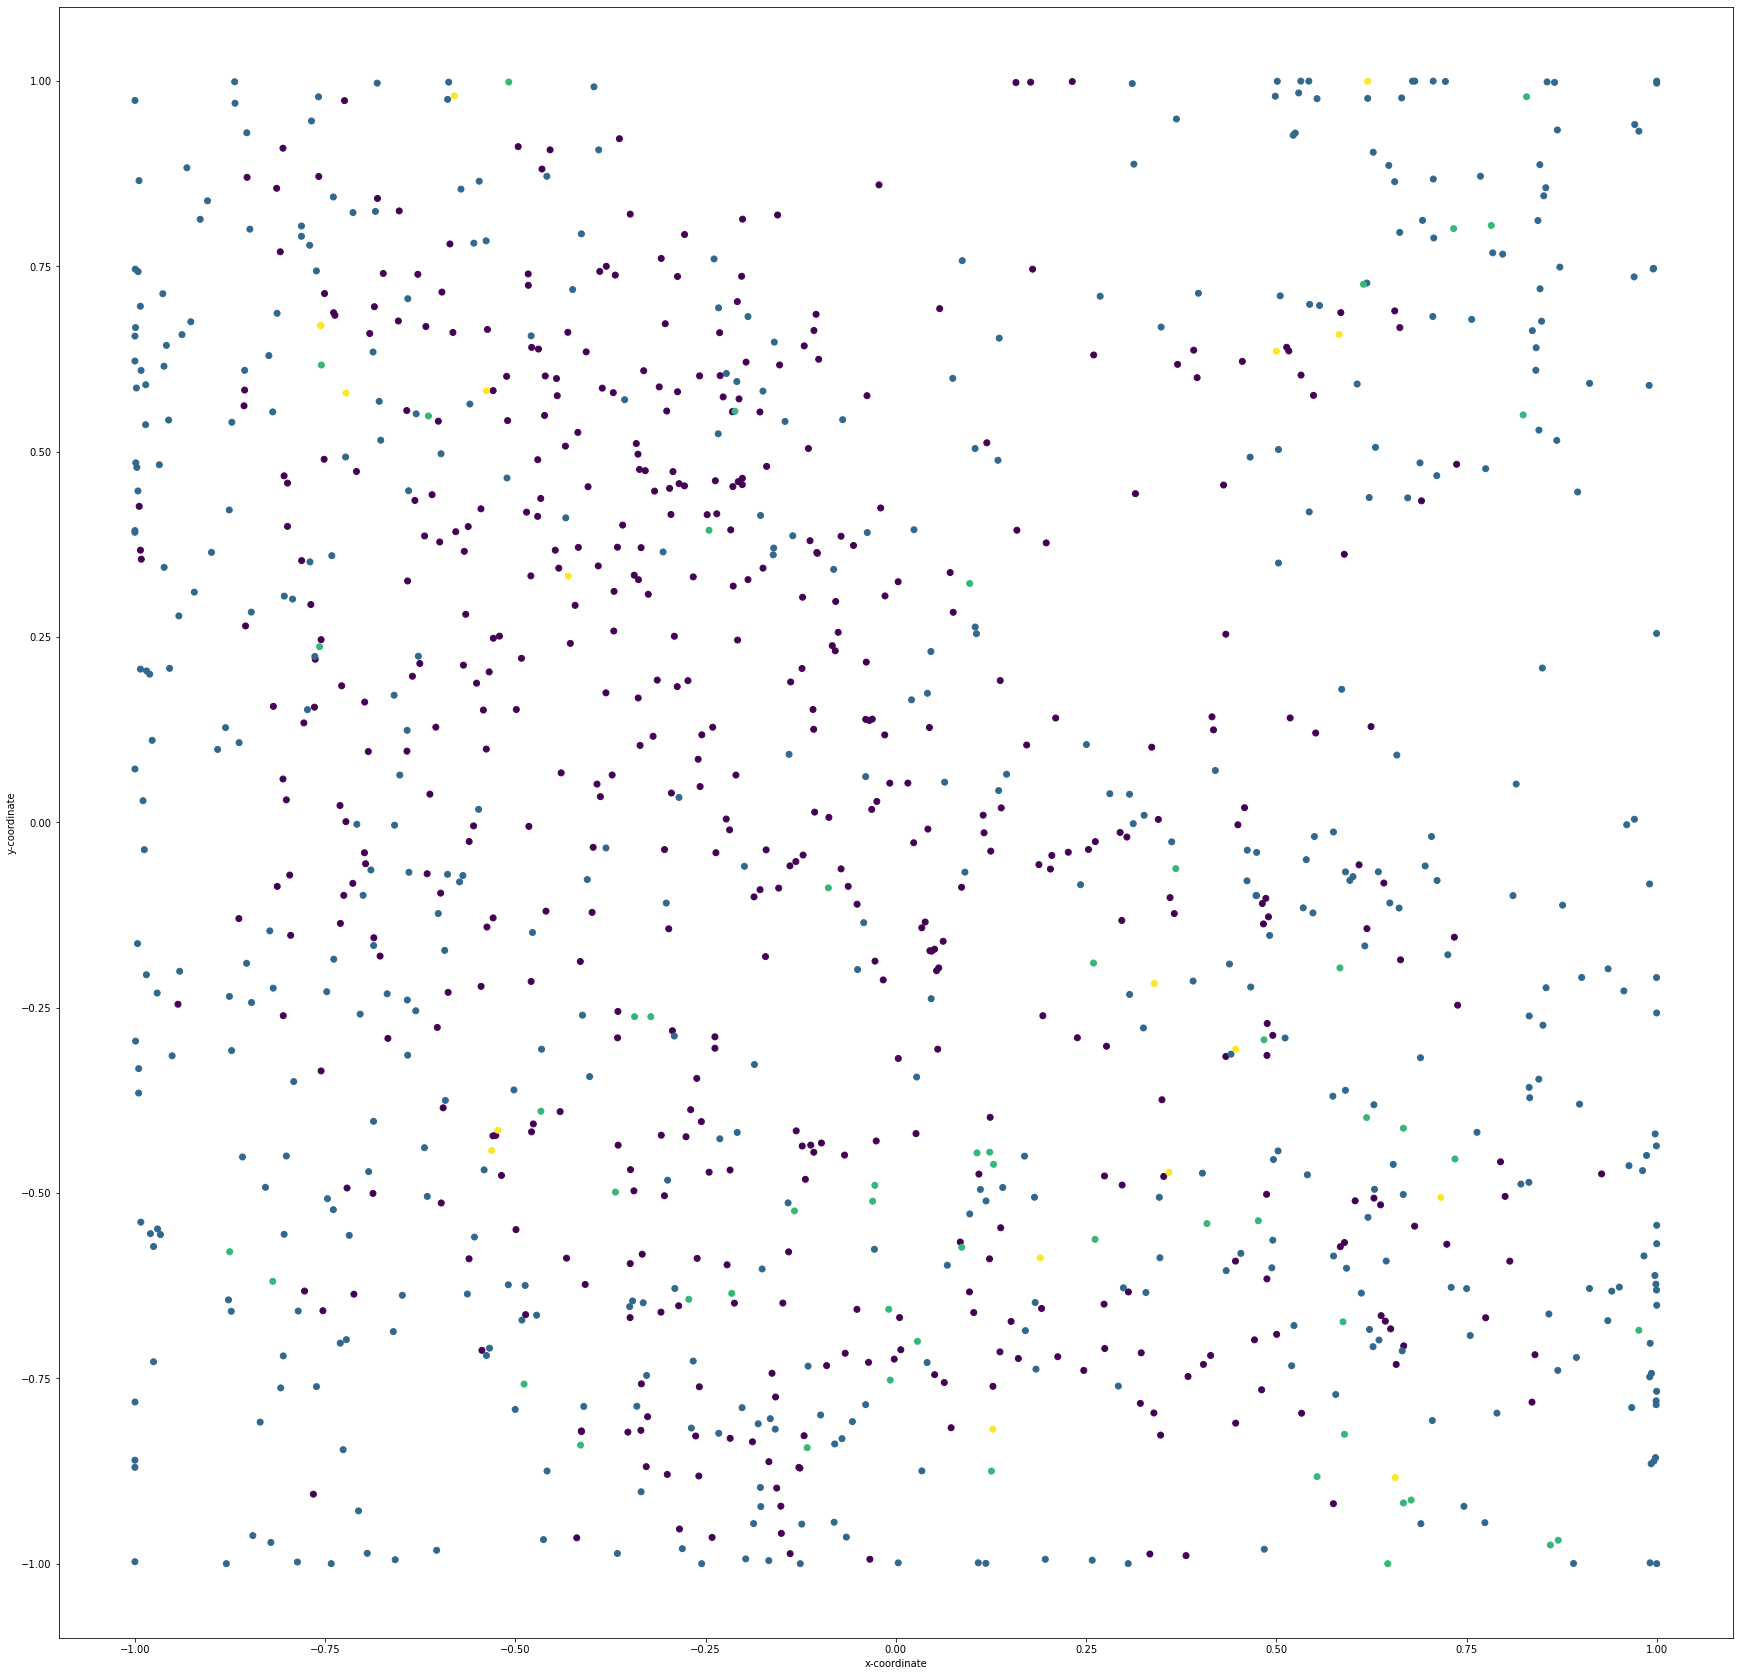

means
[[-0.24537031 -0.47188205]
 [ 0.33389482 -0.98696058]
 [-0.7808809   0.35318626]
 ...
 [ 0.58264461  0.65825195]
 [ 0.44663695 -0.30585283]
 [ 0.62014547  0.99984824]]


In [18]:
# -*- coding: utf-8 -*- 
import pandas as pd
import matplotlib.figure as figure
import matplotlib.pyplot as plt
from dcekit.generative_model import GTM
import numpy as np

# settings
#GTM map size
shape_of_map = [15, 15]
#Number of RBF
shape_of_rbf_centers = [5, 5]
#RBF variance
variance_of_rbfs = 5
#Lambda in algorithms
lambda_in_em_algorithm = 0.01
#Number of iterations in the algorithm
number_of_iterations = 100
#Learning process display flag
display_flag = 1
#Learning target file path
smote_path = "C:/Users/k_lab_pc/農薬解析/smote2/"
#Feature file
tokutyou = smote_path + "kaiseki_3"
#Class classification file path
ros =  smote_path + "kaiseki_bunrui_komakaku"

data_set = pd.read_csv( tokutyou + ".csv",sep=",",header=None)
data_target = pd.read_csv( ros + ".csv",sep=",",header=None)

# autoscaling
data_set = (data_set - data_set.mean(axis=0)) / data_set.std(axis=0, ddof=1)
#Convert NaN to 0
data_set = data_set.fillna(0)


# construct GTM model
model = GTM(shape_of_map, shape_of_rbf_centers, variance_of_rbfs, lambda_in_em_algorithm, number_of_iterations,
            display_flag)
model.fit(data_set)

print(model.success_flag)

if model.success_flag:
    # calculate of responsibilities
    responsibilities = model.responsibility(data_set)

    # plot the mean of responsibilities
    means = responsibilities.dot(model.map_grids)

    plt.figure(figsize=(30, 30))
    
    plt.scatter(means[:, 0], means[:, 1], c=data_target)
    
    print(means)
    print(data_target[0])
    print(data_target.iloc[[0]])
    print(type(data_target))

    plt.ylim(-1.1, 1.1)
    plt.xlim(-1.1, 1.1)
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")

    plt.savefig(tokutyou + '_mean_test.jpg') 
    
    plt.show()
    #Display data coordinates in order of input data
    print("means")
    #output z1,z2
    print(means)
    np.savetxt(tokutyou + '_meanData_test.csv', means, delimiter=',')


In [9]:
import matplotlib.figure as figure
import matplotlib.pyplot as plt
from dcekit.generative_model import GTM
from sklearn.datasets import load_iris

# settings
shape_of_map = [10, 10]
shape_of_rbf_centers = [5, 5]
variance_of_rbfs = 4
lambda_in_em_algorithm = 0.001
number_of_iterations = 300
display_flag = 1

# load an iris dataset
iris = load_iris()
# input_dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
input_dataset = iris.data
color = iris.target
print(type(color))
print(color)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
